In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline
import requests

In [2]:
Suicide_DF = pd.read_csv('C:/Users/User/Desktop/Suicide.csv')

In [3]:
Suicide_DF.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
Suicide_DF.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [5]:
Suicide_DF.drop(['country-year', 'HDI for year'], inplace=True, axis = 1)

In [6]:
Suicide_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


In [7]:
Suicide_DF = Suicide_DF.rename(columns={'gdp_per_capita ($)': 'gdp_per_capita', ' gdp_for_year ($) ':'gdp_for_year'})

In [8]:
for i, x in enumerate(Suicide_DF['gdp_for_year']):
    Suicide_DF['gdp_for_year'][i] = x.replace(',', '')
    
Suicide_DF['gdp_for_year'] = Suicide_DF['gdp_for_year'].astype('int64')

C:\Users\User\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
Suicide_DF.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers


In [10]:
Suicide_data=Suicide_DF
Suicide_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers


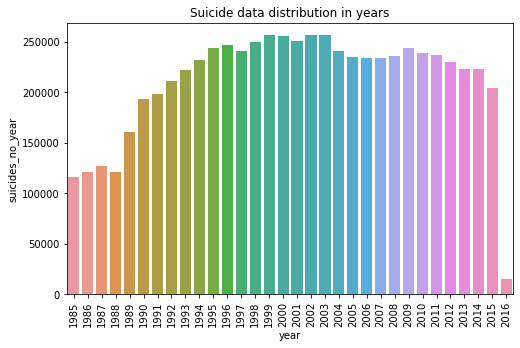

In [11]:
suicides_no_year = []

for y in Suicide_data['year'].unique():
    suicides_no_year.append(sum(Suicide_data[Suicide_data['year'] == y]['suicides_no']))

n_suicides_year = pd.DataFrame(suicides_no_year, columns=['suicides_no_year'])
n_suicides_year['year'] = Suicide_data['year'].unique()

top_year = n_suicides_year.sort_values('suicides_no_year', ascending=False)['year']
top_suicides = n_suicides_year.sort_values('suicides_no_year', ascending=False)['suicides_no_year']


plt.figure(figsize=(8,5))
plt.title("Suicide data distribution in years")
plt.xticks(rotation=90)
sns.barplot(x = top_year, y = top_suicides)

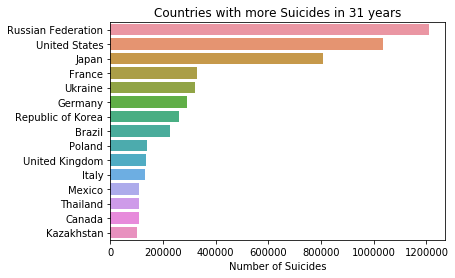

In [17]:
suicides_no_country = []
for c in Suicide_data['country'].unique():
    suicides_no_country.append(sum(Suicide_data[Suicide_data['country'] == c]['suicides_no']))
    
n_suicides_country = pd.DataFrame(suicides_no_country, columns=['suicides_no_country'])
n_suicides_country['country'] = Suicide_data['country'].unique()

quant = 15
top_country = n_suicides_country.sort_values('suicides_no_country', ascending=False)['country'][:quant]
top_suicides = n_suicides_country.sort_values('suicides_no_country', ascending=False)['suicides_no_country'][:quant]
plt.title("Countries with more Suicides in 31 years")
sns.barplot(x = top_suicides, y = top_country)
plt.ylabel('') 
plt.xlabel('Number of Suicides')

ax=plt.gca()

Text(0.5, 0, 'Number of Suicides/100kpopulation')

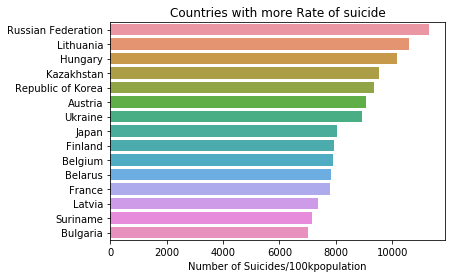

In [18]:
suicides_no_country = []
for c in Suicide_data['country'].unique():
    suicides_no_country.append(sum(Suicide_data[Suicide_data['country'] == c]['suicides/100k pop']))
    
n_suicides_country = pd.DataFrame(suicides_no_country, columns=['suicides_no_country/100k'])
n_suicides_country['country'] = Suicide_data['country'].unique()

quant = 15
top_country = n_suicides_country.sort_values('suicides_no_country/100k', ascending=False)['country'][:quant]
top_suicides = n_suicides_country.sort_values('suicides_no_country/100k', ascending=False)['suicides_no_country/100k'][:quant]
plt.title("Countries with more Rate of suicide")
sns.barplot(x = top_suicides, y = top_country)
plt.ylabel('') 
plt.xlabel('Number of Suicides/100kpopulation')

In [19]:
countries = ['Russian Federation', 'Lithuania', "Hungary", 'United States','Japan']
df_filtred = Suicide_data[[Suicide_data['country'][i] in countries for i in range(len(Suicide_data))]]
df_filtred.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
11364,Hungary,1991,male,75+ years,333,188235,176.91,34748508332,3561,G.I. Generation
11365,Hungary,1991,male,35-54 years,1271,1420586,89.47,34748508332,3561,Boomers
11366,Hungary,1991,male,55-74 years,751,874916,85.84,34748508332,3561,Silent
11367,Hungary,1991,female,75+ years,263,363039,72.44,34748508332,3561,G.I. Generation
11368,Hungary,1991,male,25-34 years,364,663374,54.87,34748508332,3561,Boomers


In [21]:
#Another way to do it
countries = ['Russian Federation', 'Lithuania',"Hungary", 'United States','Japan']
df_filtred = Suicide_data[Suicide_data['country'].isin(countries)]
df_filtred

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
11364,Hungary,1991,male,75+ years,333,188235,176.91,34748508332,3561,G.I. Generation
11365,Hungary,1991,male,35-54 years,1271,1420586,89.47,34748508332,3561,Boomers
11366,Hungary,1991,male,55-74 years,751,874916,85.84,34748508332,3561,Silent
11367,Hungary,1991,female,75+ years,263,363039,72.44,34748508332,3561,G.I. Generation
11368,Hungary,1991,male,25-34 years,364,663374,54.87,34748508332,3561,Boomers
...,...,...,...,...,...,...,...,...,...,...
27215,United States,2015,female,25-34 years,1444,21555712,6.70,18120714000000,60387,Millenials
27216,United States,2015,female,15-24 years,1132,21633813,5.23,18120714000000,60387,Millenials
27217,United States,2015,female,75+ years,540,11778666,4.58,18120714000000,60387,Silent
27218,United States,2015,male,5-14 years,255,21273987,1.20,18120714000000,60387,Generation Z


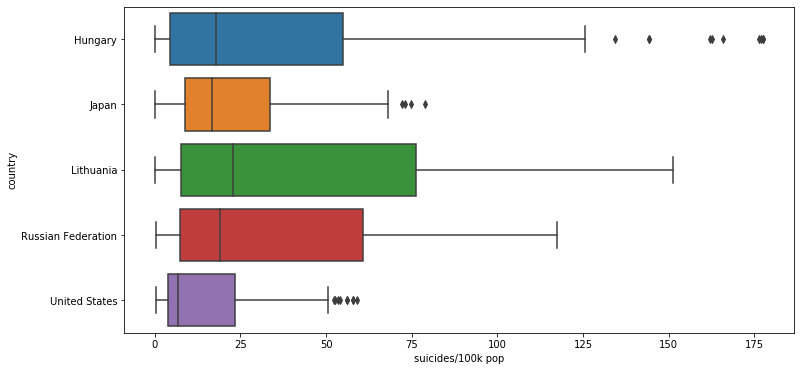

In [24]:
countries = ['Russian Federation', 'Lithuania', 'Hungary', 'United States','Japan']
df_filtred = Suicide_data[[Suicide_data['country'][i] in countries for i in range(len(Suicide_data))]]

plt.figure(figsize=(12,6))
sns.boxplot(x = 'suicides/100k pop', y = 'country', data = df_filtred)

In [25]:
df_US = Suicide_data[Suicide_data['country'] == 'United States']
df_US.drop(['country'], axis = 1, inplace = True)
df_US.head()

C:\Users\User\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
26848,1985,male,75+ years,2177,4064000,53.57,4346734000000,19693,G.I. Generation
26849,1985,male,55-74 years,5302,17971000,29.50,4346734000000,19693,G.I. Generation
26850,1985,male,25-34 years,5134,20986000,24.46,4346734000000,19693,Boomers
26851,1985,male,35-54 years,6053,26589000,22.77,4346734000000,19693,Silent
26852,1985,male,15-24 years,4267,19962000,21.38,4346734000000,19693,Generation X


In [30]:
Suicide_stad_US = pd.DataFrame(df_US.groupby("year").count())

Suicide_stad_US["Mean"] = pd.DataFrame(df_US.groupby("year")["suicides/100k pop"].mean())
Suicide_stad_US["Median"] = pd.DataFrame(df_US.groupby("year")["suicides/100k pop"].median())
Suicide_stad_US["Standard Deviation"] = pd.DataFrame(df_US.groupby("year")["suicides/100k pop"].std())
Suicide_stad_US["Variance"] = pd.DataFrame(df_US.groupby("year")["suicides/100k pop"].var())
Suicide_stad_US["SEM"] = pd.DataFrame(df_US.groupby("year")["suicides/100k pop"].sem())


Suicide_stad_US = Suicide_stad_US[["Mean", "Median", "Standard Deviation", "Variance", "SEM"]]


Suicide_stad_US.head(10)

,Mean,Median,Standard Deviation,Variance,SEM
year,,,,,
1985,15.393333,7.460,15.597443,243.280224,4.502594
1986,15.970833,7.980,16.247842,263.992372,4.690348
1987,15.971667,7.575,16.899197,285.582870,4.878378
1988,15.642500,7.150,16.566956,274.464039,4.782468
1989,15.203333,6.790,15.796919,249.542661,4.560178
1990,15.650000,6.955,16.683116,278.326345,4.816001
1991,15.314167,6.620,16.272154,264.782990,4.697366
1992,14.814167,6.540,15.300991,234.120336,4.417016
1993,14.926667,6.395,15.400206,237.166333,4.445656


In [31]:
df_US = df_US.sort_values('age', ascending=True)
df_US

,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
26953,1993,female,15-24 years,730,17630000,4.14,6878718000000,28891,Generation X
26984,1996,male,15-24 years,3724,18617800,20.00,8100201000000,32928,Generation X
27116,2007,male,15-24 years,3481,22014323,15.81,14477635000000,51585,Millenials
27176,2012,male,15-24 years,3918,22713083,17.25,16155255000000,55170,Millenials
26905,1989,female,15-24 years,764,18055000,4.23,5657693000000,24654,Generation X
...,...,...,...,...,...,...,...,...,...
27108,2006,female,75+ years,421,11356899,3.71,13855888000000,49666,Silent
27160,2011,male,75+ years,2721,7448796,36.53,15517926000000,53452,Silent
26927,1991,female,75+ years,511,8705000,5.87,6174043000000,26503,G.I. Generation
26992,1997,male,75+ years,2566,5740700,44.70,8608515000000,34644,G.I. Generation


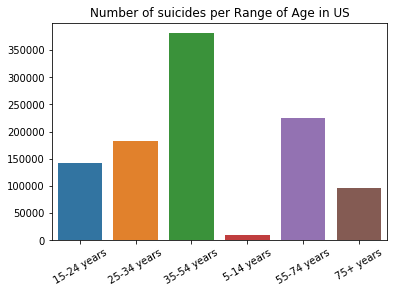

In [32]:
suicides_no_age = []

for a in df_US['age'].unique():
    suicides_no_age.append(sum(df_US[df_US['age'] == a]['suicides_no']))

plt.xticks(rotation=30)
plt.title("Number of suicides per Range of Age in US")
sns.barplot(x = df_US['age'].unique(), y = suicides_no_age)

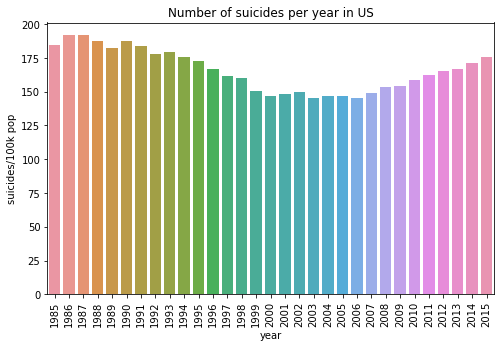

In [54]:
suicides_no_year = []

for y in df_US['year'].unique():
    suicides_no_year.append(sum(df_US[df_US['year'] == y]['suicides/100k pop']))

n_suicides_year = pd.DataFrame(suicides_no_year, columns=['suicides/100k pop'])
n_suicides_year['year'] = df_US['year'].unique()

top_year = n_suicides_year.sort_values('suicides/100k pop', ascending=False)['year']
top_suicides = n_suicides_year.sort_values('suicides/100k pop', ascending=False)['suicides/100k pop']

plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
plt.title("Number of suicides per year in US")
sns.barplot(x = top_year, y = top_suicides)

In [34]:
df_US = df_US.sort_values('sex', ascending=False)
df_US

,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
26848,1985,male,75+ years,2177,4064000,53.57,4346734000000,19693,G.I. Generation
27029,2000,male,35-54 years,9263,40945028,22.62,10284779000000,39218,Boomers
26981,1996,male,55-74 years,4613,18490700,24.95,8100201000000,32928,Silent
27113,2007,male,35-54 years,10978,42992076,25.53,14477635000000,51585,Boomers
26995,1997,male,35-54 years,8920,38339600,23.27,8608515000000,34644,Boomers
...,...,...,...,...,...,...,...,...,...
26901,1989,female,35-54 years,2159,31264000,6.91,5657693000000,24654,Silent
27213,2015,female,35-54 years,4053,41531809,9.76,18120714000000,60387,Generation X
27177,2012,female,35-54 years,3857,42238495,9.13,16155255000000,55170,Generation X
26985,1996,female,35-54 years,2594,38357900,6.76,8100201000000,32928,Boomers


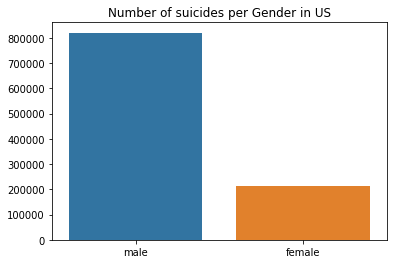

In [35]:
suicides_no_sex = []

for s in df_US['sex'].unique():
    suicides_no_sex.append(sum(df_US[df_US['sex'] == s]['suicides_no']))
suicides_no_sex
plt.title("Number of suicides per Gender in US")
sns.barplot(x =df_US['sex'].unique(), y = suicides_no_sex)

In [36]:
sexPie=df_US.groupby("sex")['sex'].count()
sexPie

sex
female    186
male      186
Name: sex, dtype: int64

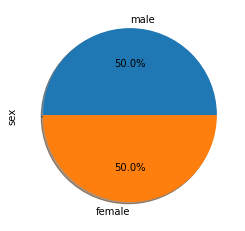

In [37]:
#male and female are the same. Values change when you group the sex in different categories. 
explode=(0,0)
sexPie=df_US.groupby("sex")['sex'].count().sort_index(ascending=False)
sexPie.plot(kind='pie', explode=explode, autopct="%1.1f%%", shadow=True)

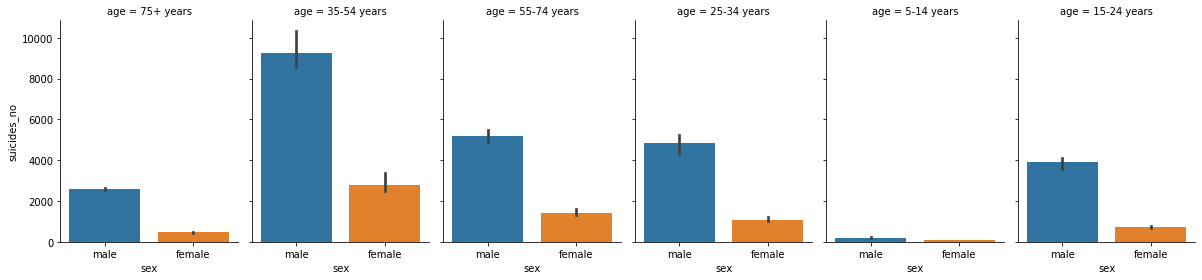

In [38]:
sns.catplot(x='sex', y='suicides_no',col='age', data=df_US, estimator=np.median,height=4, aspect=.7,kind='bar')

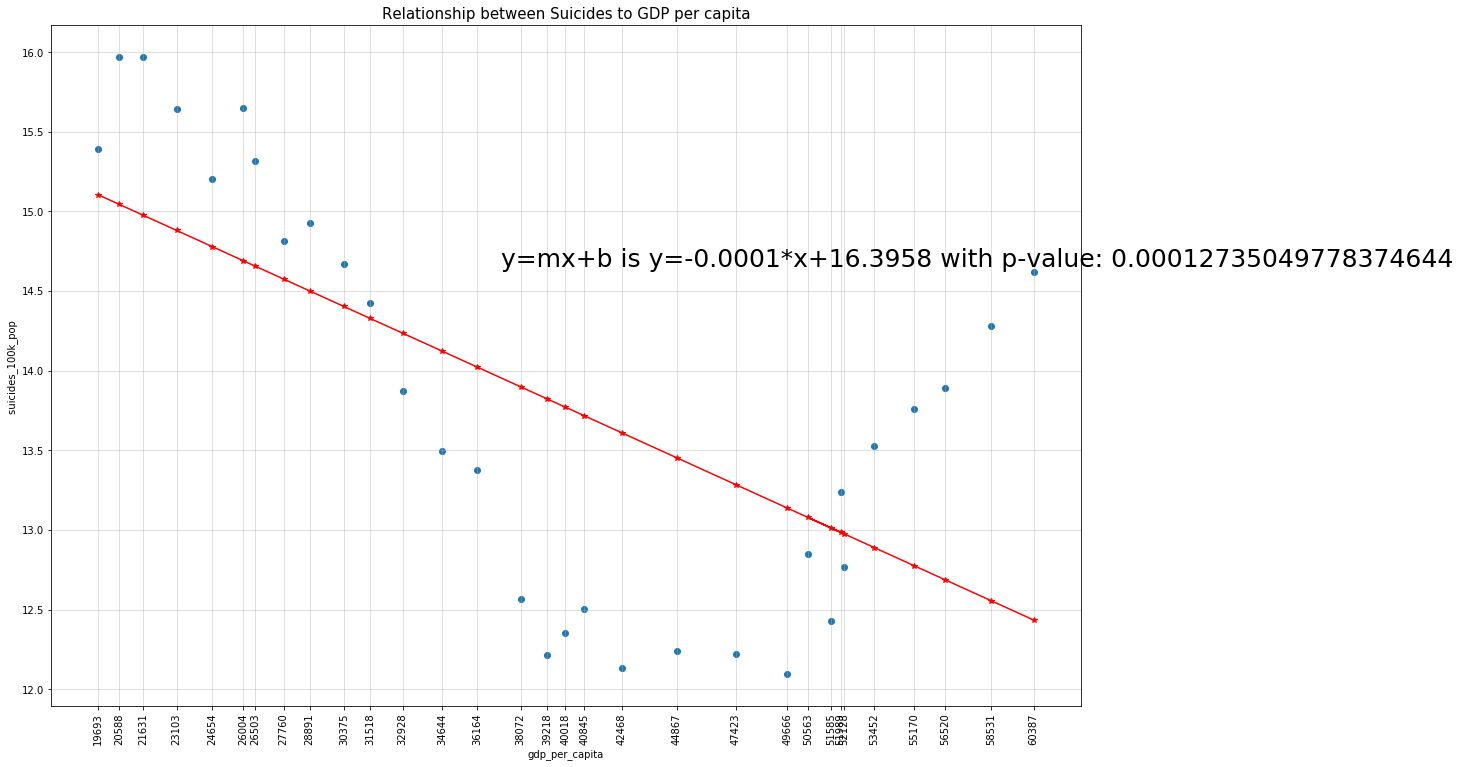

In [39]:
gdp_per_capita =df_US.groupby("year")["gdp_per_capita"].mean()
suicides_100k_pop = df_US.groupby("year")["suicides/100k pop"].mean()
slope, intercept, rvalue, pvalue, stderr = st.linregress(gdp_per_capita, suicides_100k_pop)

line = slope * gdp_per_capita  + intercept
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(15,10))

plt.scatter(gdp_per_capita,suicides_100k_pop)    # you had originally inverted the scatter, and hence different view
plt.tight_layout()
plt.title('Relationship between Suicides to GDP per capita',fontsize=15)
plt.xlabel("gdp_per_capita")
plt.ylabel("suicides_100k_pop ")
# plt.plot(gdp_per_capita,line,"--")
plt.xticks(gdp_per_capita, rotation=90)
plt.grid(b=True,alpha=0.50)
plt.annotate(s=f'y=mx+b is y={round(slope,4)}*x+{round(intercept,4)} with p-value: {pvalue}',xy=(450,440),xycoords='axes points',fontsize=25)

plt.plot(gdp_per_capita, slope*gdp_per_capita + intercept,marker='*',color='r')

plt.show()

In [40]:
# gdp_per_capita
# suicides_100k_pop

df_compare=pd.DataFrame({'Year':gdp_per_capita.index,'GDPperCapita':gdp_per_capita,'Sper100K':suicides_100k_pop})
# df_compare

Text(0.5, 1, 'Using LMPlot to compare linear regression above')

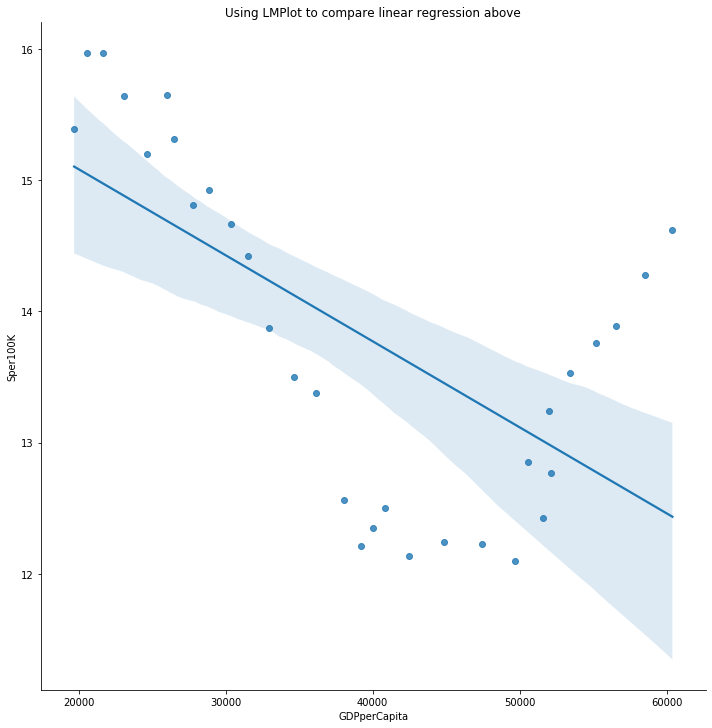

In [41]:
sns.lmplot(x='GDPperCapita',y='Sper100K',fit_reg=True,data=df_compare,height=10)
plt.title('Using LMPlot to compare linear regression above')

In [42]:
df_Lit = Suicide_data[Suicide_data['country'] == 'Lithuania']
df_Lit.drop(['country'], axis = 1, inplace = True)
df_Lit.head()

C:\Users\User\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
15044,1995,male,35-54 years,632,436306,144.85,7870782261,2324,Boomers
15045,1995,male,75+ years,67,47214,141.91,7870782261,2324,G.I. Generation
15046,1995,male,55-74 years,325,274196,118.53,7870782261,2324,Silent
15047,1995,male,25-34 years,226,284758,79.37,7870782261,2324,Generation X
15048,1995,male,15-24 years,134,263792,50.80,7870782261,2324,Generation X


In [44]:
Suicide_stad_Lit = pd.DataFrame(df_Lit.groupby("year").count())
Suicide_stad_Lit["Mean"] = pd.DataFrame(df_Lit.groupby("year")["suicides/100k pop"].mean())
Suicide_stad_Lit["Median"] = pd.DataFrame(df_Lit.groupby("year")["suicides/100k pop"].median())
Suicide_stad_Lit["Standard Deviation"] = pd.DataFrame(df_Lit.groupby("year")["suicides/100k pop"].std())
Suicide_stad_Lit["Variance"] = pd.DataFrame(df_Lit.groupby("year")["suicides/100k pop"].var())
Suicide_stad_Lit["SEM"] = pd.DataFrame(df_Lit.groupby("year")["suicides/100k pop"].sem())


Suicide_stad_Lit = Suicide_stad_Lit[["Mean", "Median", "Standard Deviation", "Variance", "SEM"]]


Suicide_stad_Lit.head(10)

,Mean,Median,Standard Deviation,Variance,SEM
year,,,,,
1995,53.275000,29.230,54.353731,2954.328045,15.690571
1996,49.634167,31.940,49.039481,2404.870736,14.156479
1997,47.120000,24.160,47.081111,2216.631000,13.591146
1998,47.196667,28.075,47.455529,2252.027224,13.699231
1999,46.794167,25.485,45.790253,2096.747299,13.218508
2000,47.650000,26.910,45.744496,2092.558891,13.205298
2001,47.415000,26.905,46.994036,2208.439464,13.566010
2002,46.301667,25.010,45.956963,2112.042433,13.266632
2003,44.210000,23.675,43.753177,1914.340527,12.630454


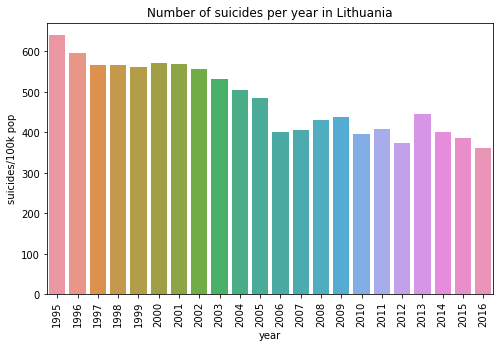

In [55]:
suicides_no_year = []

for y in df_Lit['year'].unique():
    suicides_no_year.append(sum(df_Lit[df_Lit['year'] == y]['suicides/100k pop']))

n_suicides_year = pd.DataFrame(suicides_no_year, columns=['suicides/100k pop'])
n_suicides_year['year'] = df_Lit['year'].unique()

top_year = n_suicides_year.sort_values('suicides/100k pop', ascending=False)['year']
top_suicides = n_suicides_year.sort_values('suicides/100k pop', ascending=False)['suicides/100k pop']

plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
plt.title("Number of suicides per year in Lithuania")
sns.barplot(x = top_year, y = top_suicides)

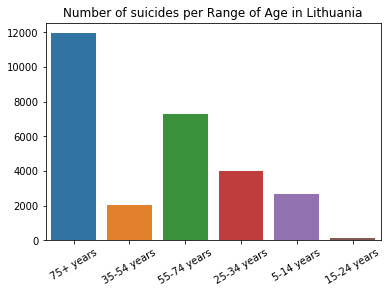

In [46]:
suicides_no_age = []

for a in df_Lit['age'].unique():
    suicides_no_age.append(sum(df_Lit[df_Lit['age'] == a]['suicides_no']))

plt.xticks(rotation=30)
plt.title("Number of suicides per Range of Age in Lithuania")
sns.barplot(x = df_US['age'].unique(), y = suicides_no_age)

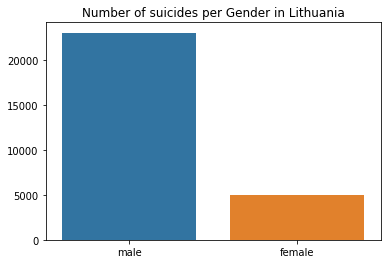

In [47]:
suicides_no_sex = []

for s in df_Lit['sex'].unique():
    suicides_no_sex.append(sum(df_Lit[df_Lit['sex'] == s]['suicides_no']))
suicides_no_sex
plt.title("Number of suicides per Gender in Lithuania")
sns.barplot(x =df_Lit['sex'].unique(), y = suicides_no_sex)

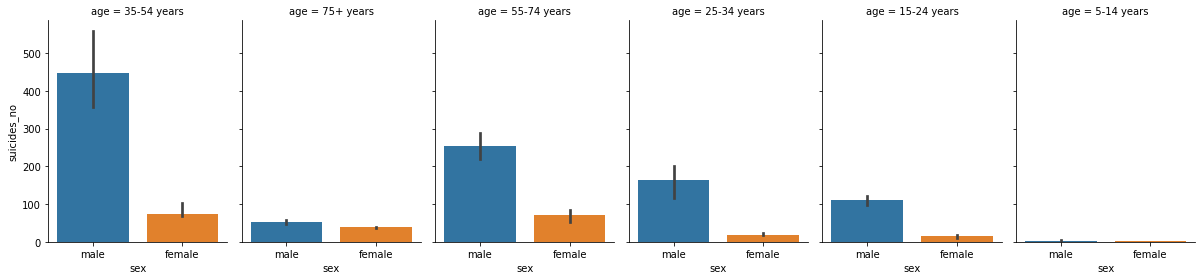

In [48]:
sns.catplot(x='sex', y='suicides_no',col='age', data=df_Lit, estimator=np.median,height=4, aspect=.7,kind='bar')

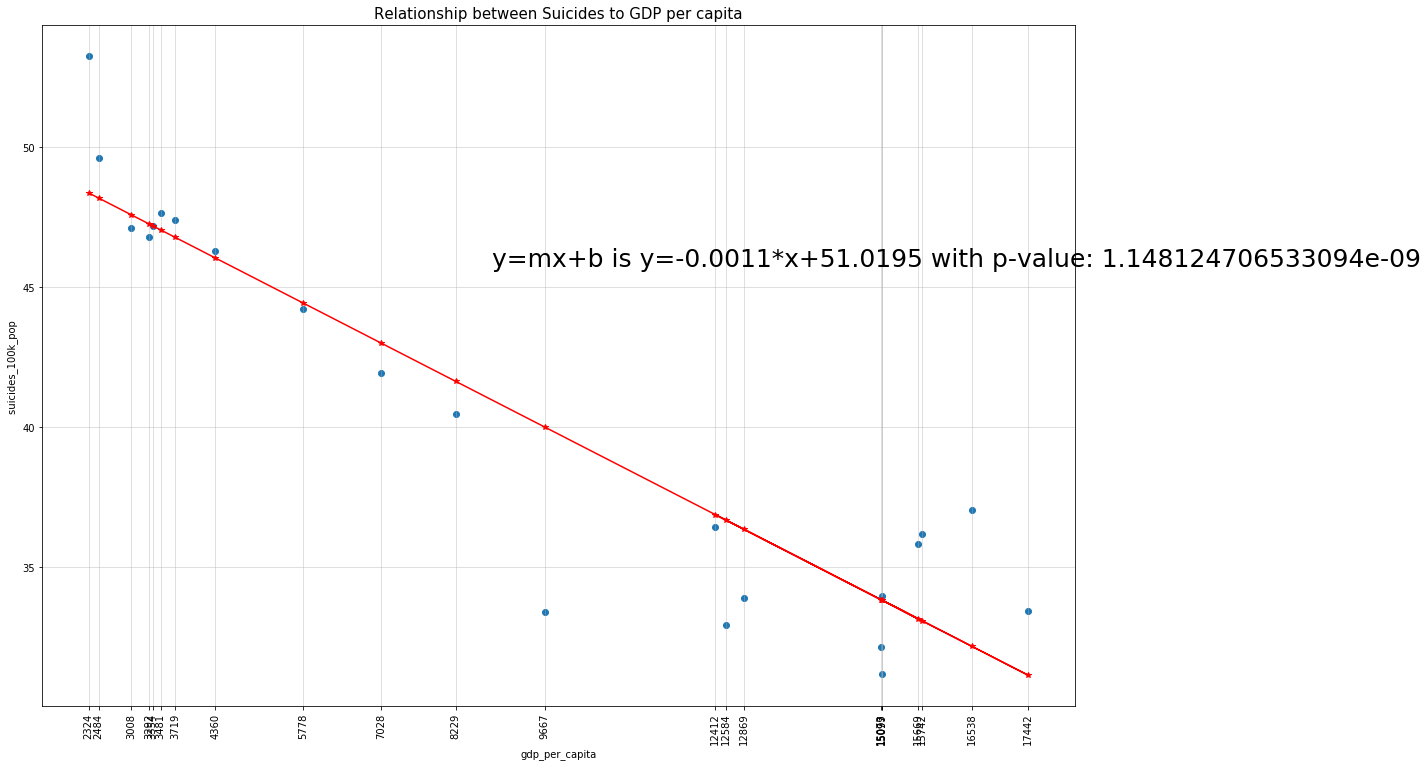

In [49]:
gdp_per_capita =df_Lit.groupby("year")["gdp_per_capita"].mean()
suicides_100k_pop = df_Lit.groupby("year")["suicides/100k pop"].mean()
slope, intercept, rvalue, pvalue, stderr = st.linregress(gdp_per_capita, suicides_100k_pop)

line = slope * gdp_per_capita  + intercept
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(15,10))

plt.scatter(gdp_per_capita,suicides_100k_pop)    # you had originally inverted the scatter, and hence different view
plt.tight_layout()
plt.title('Relationship between Suicides to GDP per capita',fontsize=15)
plt.xlabel("gdp_per_capita")
plt.ylabel("suicides_100k_pop ")
# plt.plot(gdp_per_capita,line,"--")
plt.xticks(gdp_per_capita, rotation=90)
plt.grid(b=True,alpha=0.50)
plt.annotate(s=f'y=mx+b is y={round(slope,4)}*x+{round(intercept,4)} with p-value: {pvalue}',xy=(450,440),xycoords='axes points',fontsize=25)

plt.plot(gdp_per_capita, slope*gdp_per_capita + intercept,marker='*',color='r')

plt.show()

In [50]:
# gdp_per_capita
# suicides_100k_pop

df_compare=pd.DataFrame({'Year':gdp_per_capita.index,'GDPperCapita':gdp_per_capita,'Sper100K':suicides_100k_pop})
# df_compare

Text(0.5, 1, 'Using LMPlot to compare linear regression above')

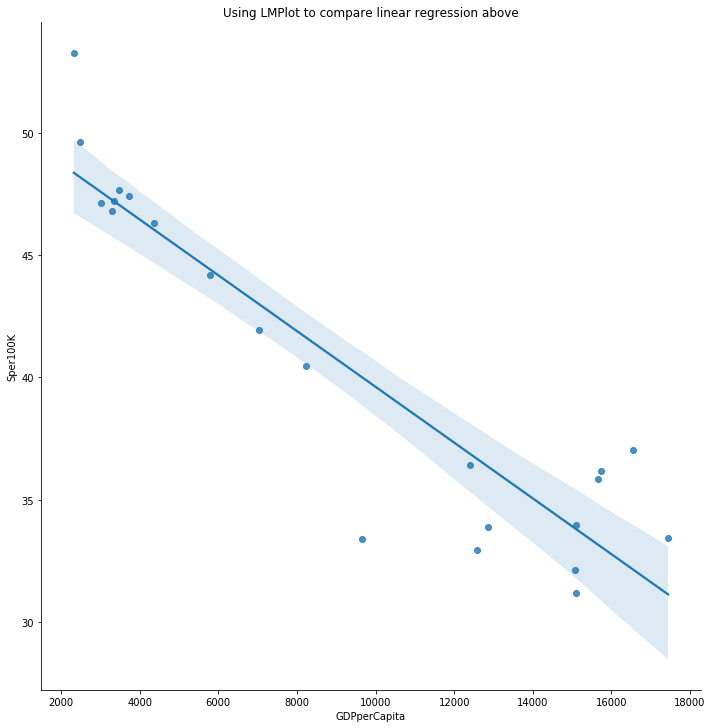

In [51]:
sns.lmplot(x='GDPperCapita',y='Sper100K',fit_reg=True,data=df_compare,height=10)
plt.title('Using LMPlot to compare linear regression above')

In [52]:
df_russian = Suicide_data[Suicide_data['country'] == 'Russian Federation']
df_russian.drop(['country'], axis = 1, inplace = True)
df_russian.head()

C:\Users\User\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
20936,1989,male,75+ years,1393,1349100,103.25,506500173960,3740,G.I. Generation
20937,1989,male,35-54 years,12030,18058500,66.62,506500173960,3740,Silent
20938,1989,male,55-74 years,6250,9383700,66.60,506500173960,3740,G.I. Generation
20939,1989,male,25-34 years,6856,12748800,53.78,506500173960,3740,Boomers
20940,1989,female,75+ years,1677,4738100,35.39,506500173960,3740,G.I. Generation


In [53]:
Suicide_stad_russian = pd.DataFrame(df_russian.groupby("year").count())

Suicide_stad_russian["Mean"] = pd.DataFrame(df_russian.groupby("year")["suicides/100k pop"].mean())
Suicide_stad_russian["Median"] = pd.DataFrame(df_russian.groupby("year")["suicides/100k pop"].median())
Suicide_stad_russian["Standard Deviation"] = pd.DataFrame(df_russian.groupby("year")["suicides/100k pop"].std())
Suicide_stad_russian["Variance"] = pd.DataFrame(df_russian.groupby("year")["suicides/100k pop"].var())
Suicide_stad_russian["SEM"] = pd.DataFrame(df_russian.groupby("year")["suicides/100k pop"].sem())


Suicide_stad_russian = Suicide_stad_russian[["Mean", "Median", "Standard Deviation", "Variance", "SEM"]]


Suicide_stad_russian.head(27)

,Mean,Median,Standard Deviation,Variance,SEM
year,,,,,
1989,33.235000,22.610,32.615971,1063.801536,9.415420
1990,33.264167,24.145,31.806766,1011.670390,9.181823
1991,33.033333,24.025,31.531402,994.229315,9.102332
1992,36.456667,25.040,34.208668,1170.232988,9.875192
1993,43.505000,26.260,41.805593,1747.707573,12.068235
1994,47.303333,26.335,45.789323,2096.662061,13.218239
1995,45.615000,27.540,42.427407,1800.084827,12.247737
1996,43.856667,25.385,41.184245,1696.142061,11.888868
1997,42.340833,25.435,39.322482,1546.257627,11.351423


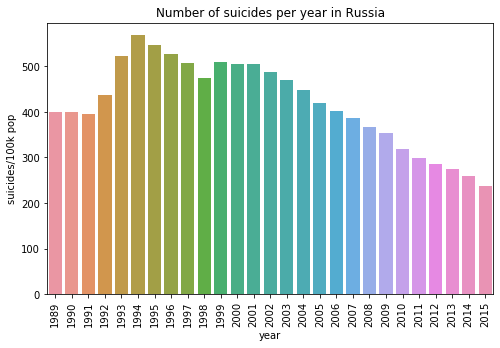

In [56]:
suicides_no_year = []

for y in df_russian['year'].unique():
    suicides_no_year.append(sum(df_russian[df_russian['year'] == y]["suicides/100k pop"]))

n_suicides_year = pd.DataFrame(suicides_no_year, columns=["suicides/100k pop"])
n_suicides_year['year'] = df_russian['year'].unique()

top_year = n_suicides_year.sort_values('suicides/100k pop', ascending=False)['year']
top_suicides = n_suicides_year.sort_values('suicides/100k pop', ascending=False)['suicides/100k pop']

plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
plt.title("Number of suicides per year in Russia")
sns.barplot(x = top_year, y = top_suicides)

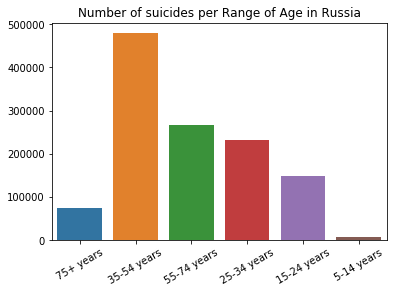

In [57]:
suicides_no_age = []

for a in df_russian['age'].unique():
    suicides_no_age.append(sum(df_russian[df_russian['age'] == a]['suicides_no']))

plt.xticks(rotation=30)
plt.title("Number of suicides per Range of Age in Russia")
sns.barplot(x = df_russian['age'].unique(), y = suicides_no_age)

In [58]:
df_russian['sex'].value_counts()

female    162
male      162
Name: sex, dtype: int64

Text(0.5, 1.0, 'Distribution Of Female Vs male in Russian Dataset')

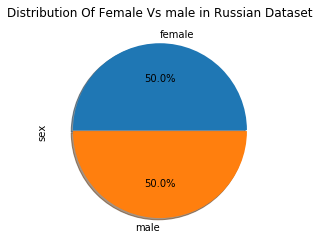

In [59]:
explode=(0.01,0)

sexPie=df_russian['sex'].value_counts()  
sexPie.plot(kind='pie', explode=explode, autopct="%1.1f%%", shadow=True)
plt.title("Distribution Of Female Vs male in Russian Dataset")

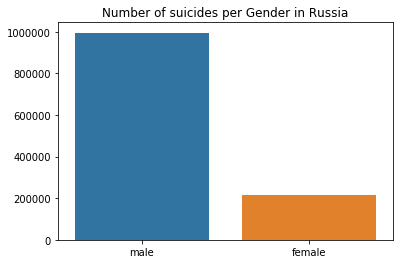

In [60]:
suicides_no_sex = []

for s in df_russian['sex'].unique():
    suicides_no_sex.append(sum(df_russian[df_russian['sex'] == s]['suicides_no']))
plt.title("Number of suicides per Gender in Russia")
sns.barplot(x =df_russian['sex'].unique(), y = suicides_no_sex)

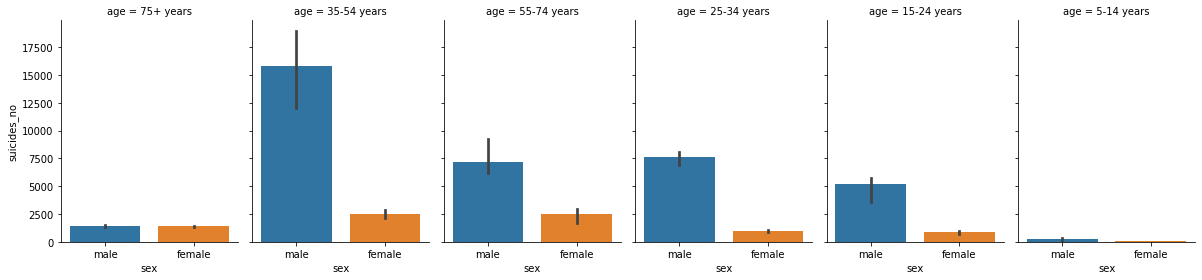

In [61]:
sns.catplot(x='sex', y='suicides_no',col='age', data=df_russian, estimator=np.median,height=4, aspect=.7,kind='bar')

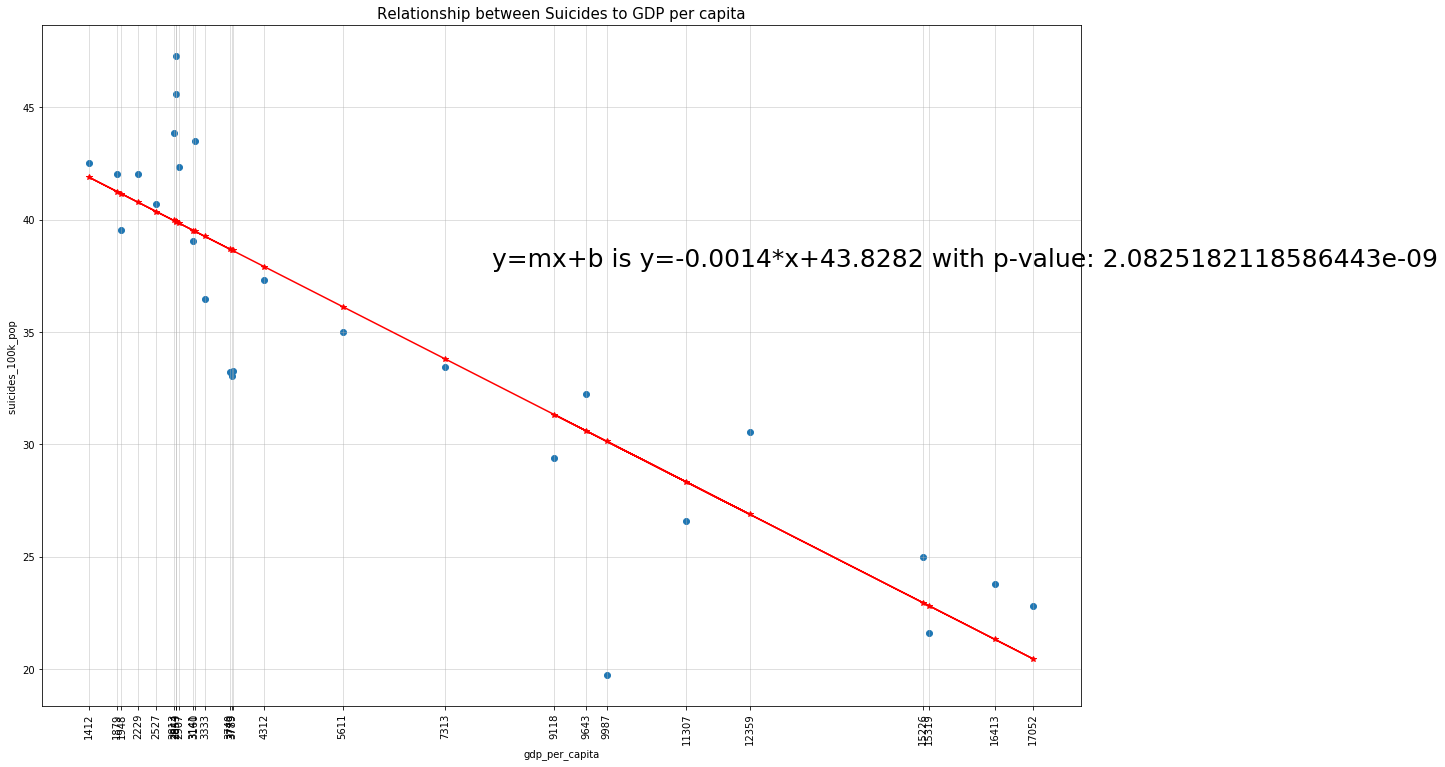

In [62]:
gdp_per_capita =df_russian.groupby("year")["gdp_per_capita"].mean()
suicides_100k_pop = df_russian.groupby("year")["suicides/100k pop"].mean()
slope, intercept, rvalue, pvalue, stderr = st.linregress(gdp_per_capita, suicides_100k_pop)

line = slope * gdp_per_capita  + intercept
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(15,10))

plt.scatter(gdp_per_capita,suicides_100k_pop)   
plt.tight_layout()
plt.title('Relationship between Suicides to GDP per capita',fontsize=15)
plt.xlabel("gdp_per_capita")
plt.ylabel("suicides_100k_pop ")
plt.xticks(gdp_per_capita, rotation=90)
plt.grid(b=True,alpha=0.50)
plt.annotate(s=f'y=mx+b is y={round(slope,4)}*x+{round(intercept,4)} with p-value: {pvalue}',xy=(450,440),xycoords='axes points',fontsize=25)

plt.plot(gdp_per_capita, slope*gdp_per_capita + intercept,marker='*',color='r')

plt.show()


In [63]:
df_compare=pd.DataFrame({'Year':gdp_per_capita.index,'GDPperCapita':gdp_per_capita,'Sper100K':suicides_100k_pop})

Text(0.5, 1, 'Relationship between Suicides to GDP per capita in Russia')

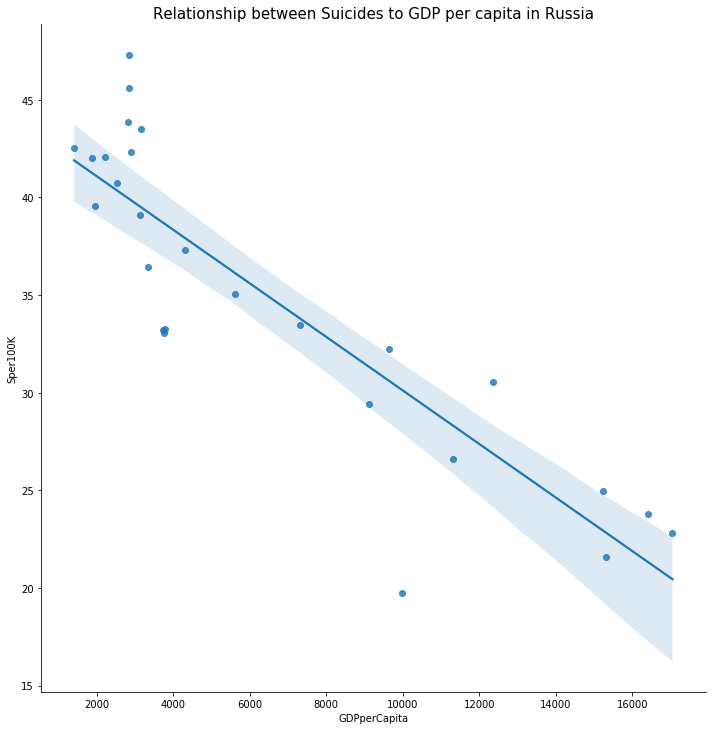

In [64]:
sns.lmplot(x='GDPperCapita',y='Sper100K',fit_reg=True,data=df_compare,height=10)
plt.title('Relationship between Suicides to GDP per capita in Russia',fontsize=15)

In [65]:
df_hungary = Suicide_data[Suicide_data['country'] == 'Hungary']
df_hungary.drop(['country'], axis = 1, inplace = True)
df_hungary.head()

C:\Users\User\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
11364,1991,male,75+ years,333,188235,176.91,34748508332,3561,G.I. Generation
11365,1991,male,35-54 years,1271,1420586,89.47,34748508332,3561,Boomers
11366,1991,male,55-74 years,751,874916,85.84,34748508332,3561,Silent
11367,1991,female,75+ years,263,363039,72.44,34748508332,3561,G.I. Generation
11368,1991,male,25-34 years,364,663374,54.87,34748508332,3561,Boomers


In [66]:
Suicide_stad_hungary = pd.DataFrame(df_hungary.groupby("year").count())

Suicide_stad_hungary["Mean"] = pd.DataFrame(df_hungary.groupby("year")["suicides/100k pop"].mean())
Suicide_stad_hungary["Median"] = pd.DataFrame(df_hungary.groupby("year")["suicides/100k pop"].median())
Suicide_stad_hungary["Standard Deviation"] = pd.DataFrame(df_hungary.groupby("year")["suicides/100k pop"].std())
Suicide_stad_hungary["Variance"] = pd.DataFrame(df_hungary.groupby("year")["suicides/100k pop"].var())
Suicide_stad_hungary["SEM"] = pd.DataFrame(df_hungary.groupby("year")["suicides/100k pop"].sem())


Suicide_stad_hungary = Suicide_stad_hungary[["Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

Suicide_stad_hungary.head(10)

,Mean,Median,Standard Deviation,Variance,SEM
year,,,,,
1991,47.916667,28.125,51.870454,2690.543970,14.973710
1992,47.521667,28.995,51.524622,2654.786670,14.873877
1993,44.940000,25.535,51.216460,2623.125818,14.784919
1994,44.650833,21.635,51.621140,2664.742045,14.901739
1995,41.118333,23.015,48.006472,2304.621324,13.858275
1996,40.228333,23.255,44.062214,1941.478742,12.719666
1997,39.203333,21.045,46.945738,2203.902333,13.552067
1998,36.398333,19.150,39.249732,1540.541488,11.330422
1999,40.323333,21.090,47.695207,2274.832788,13.768420


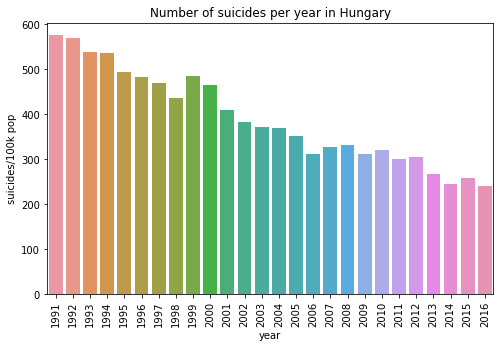

In [67]:
suicides_no_year = []

for y in df_hungary['year'].unique():
    suicides_no_year.append(sum(df_hungary[df_hungary['year'] == y]["suicides/100k pop"]))

n_suicides_year = pd.DataFrame(suicides_no_year, columns=["suicides/100k pop"])
n_suicides_year['year'] = df_hungary['year'].unique()

top_year = n_suicides_year.sort_values('suicides/100k pop', ascending=False)['year']
top_suicides = n_suicides_year.sort_values('suicides/100k pop', ascending=False)['suicides/100k pop']

plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
plt.title("Number of suicides per year in Hungary")
sns.barplot(x = top_year, y = top_suicides)

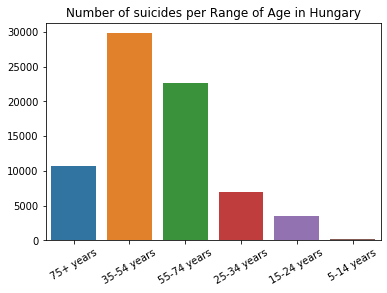

In [68]:
suicides_no_age = []

for a in df_hungary['age'].unique():
    suicides_no_age.append(sum(df_hungary[df_hungary['age'] == a]['suicides_no']))

plt.xticks(rotation=30)
plt.title("Number of suicides per Range of Age in Hungary")
sns.barplot(x = df_hungary['age'].unique(), y = suicides_no_age)

In [69]:
df_hungary['sex'].value_counts()

female    155
male      155
Name: sex, dtype: int64

Text(0.5, 1.0, 'Distribution Of Female Vs male in Hungary Dataset')

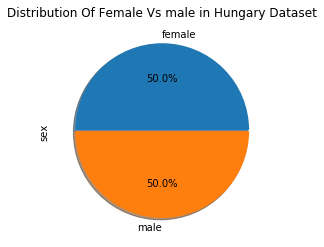

In [70]:
explode=(0.01,0)

sexPie=df_hungary['sex'].value_counts() 
sexPie.plot(kind='pie', explode=explode, autopct="%1.1f%%", shadow=True)
plt.title("Distribution Of Female Vs male in Hungary Dataset")

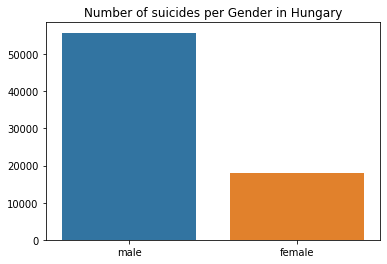

In [71]:
suicides_no_sex = []

for s in df_hungary['sex'].unique():
    suicides_no_sex.append(sum(df_hungary[df_hungary['sex'] == s]['suicides_no']))
plt.title("Number of suicides per Gender in Hungary")
sns.barplot(x =df_hungary['sex'].unique(), y = suicides_no_sex)

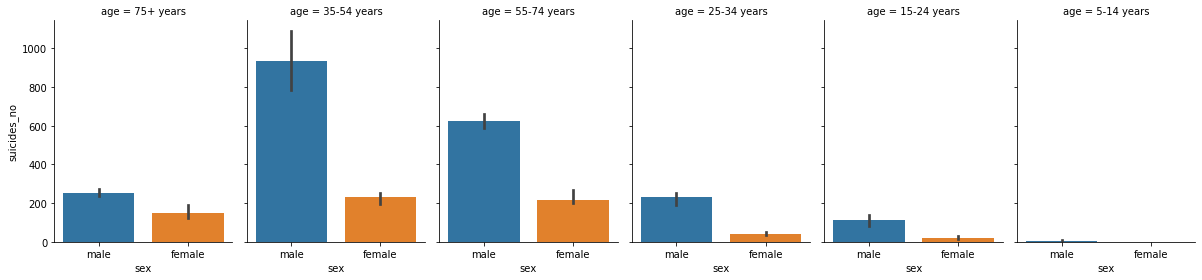

In [72]:
sns.catplot(x='sex', y='suicides_no',col='age', data=df_hungary, estimator=np.median,height=4, aspect=.7,kind='bar')

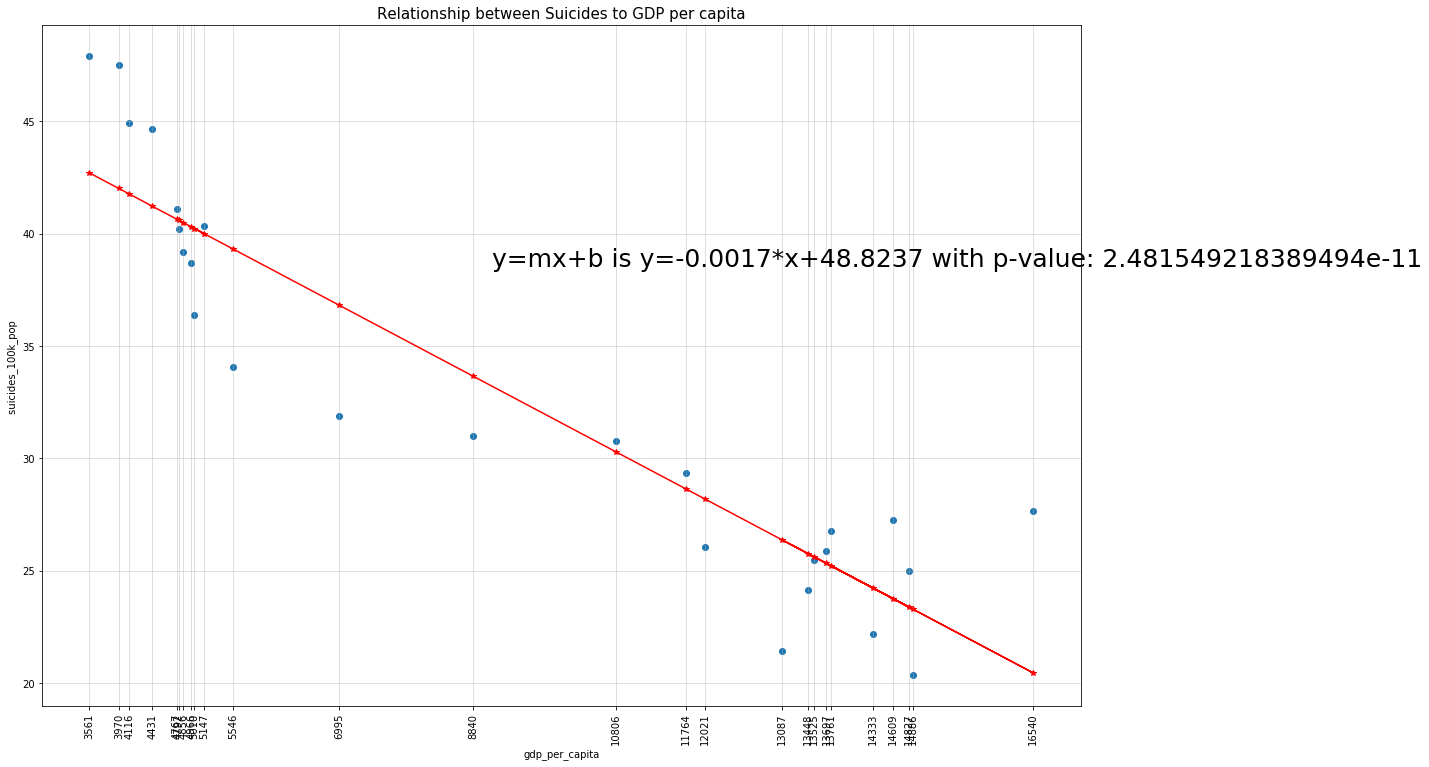

In [73]:
gdp_per_capita =df_hungary.groupby("year")["gdp_per_capita"].mean()
suicides_100k_pop = df_hungary.groupby("year")["suicides/100k pop"].mean()
slope, intercept, rvalue, pvalue, stderr = st.linregress(gdp_per_capita, suicides_100k_pop)

line = slope * gdp_per_capita  + intercept
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(15,10))

plt.scatter(gdp_per_capita,suicides_100k_pop)    
plt.tight_layout()
plt.title('Relationship between Suicides to GDP per capita',fontsize=15)
plt.xlabel("gdp_per_capita")
plt.ylabel("suicides_100k_pop ")
plt.xticks(gdp_per_capita, rotation=90)
plt.grid(b=True,alpha=0.50)
plt.annotate(s=f'y=mx+b is y={round(slope,4)}*x+{round(intercept,4)} with p-value: {pvalue}',xy=(450,440),xycoords='axes points',fontsize=25)

plt.plot(gdp_per_capita, slope*gdp_per_capita + intercept,marker='*',color='r')

plt.show()

In [74]:
df_compare=pd.DataFrame({'Year':gdp_per_capita.index,'GDPperCapita':gdp_per_capita,'Sper100K':suicides_100k_pop})

Text(0.5, 1, 'Relationship between Suicides to GDP per capita in hungary')

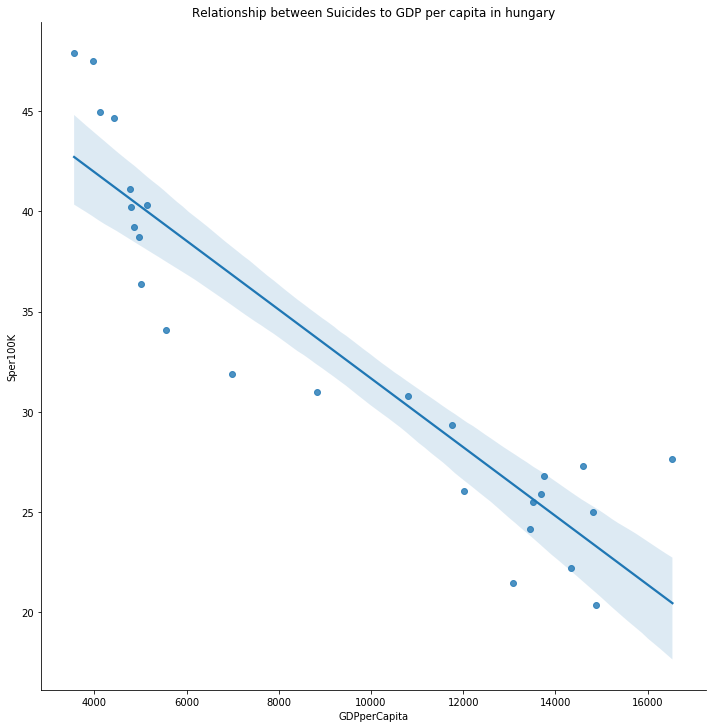

In [75]:
sns.lmplot(x='GDPperCapita',y='Sper100K',fit_reg=True,data=df_compare,height=10)
plt.title('Relationship between Suicides to GDP per capita in hungary')

In [76]:
df_japan = Suicide_data[Suicide_data['country'] == 'Japan']
df_japan.drop(['country'], axis = 1, inplace = True)
df_japan.head()

C:\Users\User\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
13364,1985,male,75+ years,1340,1791000,74.82,1398892744821,12401,G.I. Generation
13365,1985,female,75+ years,1553,2862400,54.26,1398892744821,12401,G.I. Generation
13366,1985,male,55-74 years,3763,8996900,41.83,1398892744821,12401,G.I. Generation
13367,1985,male,35-54 years,6962,17833300,39.04,1398892744821,12401,Silent
13368,1985,male,25-34 years,1982,8465800,23.41,1398892744821,12401,Boomers


In [77]:
Suicide_stad_japan = pd.DataFrame(df_japan.groupby("year").count())

Suicide_stad_japan["Mean"] = pd.DataFrame(df_japan.groupby("year")["suicides/100k pop"].mean())
Suicide_stad_japan["Median"] = pd.DataFrame(df_japan.groupby("year")["suicides/100k pop"].median())
Suicide_stad_japan["Standard Deviation"] = pd.DataFrame(df_japan.groupby("year")["suicides/100k pop"].std())
Suicide_stad_japan["Variance"] = pd.DataFrame(df_japan.groupby("year")["suicides/100k pop"].var())
Suicide_stad_japan["SEM"] = pd.DataFrame(df_japan.groupby("year")["suicides/100k pop"].sem())


Suicide_stad_japan = Suicide_stad_japan[["Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

Suicide_stad_japan.head(10)

,Mean,Median,Standard Deviation,Variance,SEM
year,,,,,
1985,25.039167,18.725,23.122681,534.658390,6.674943
1986,26.962500,20.210,24.277177,589.381330,7.008217
1987,24.607500,18.675,22.518494,507.082566,6.500529
1988,23.726667,17.575,22.363585,500.129915,6.455811
1989,21.951667,16.255,20.938482,438.420033,6.044419
1990,20.530833,15.180,19.555278,382.408881,5.645122
1991,19.542500,14.650,18.133922,328.839111,5.234812
1992,20.023333,14.910,18.395729,338.402861,5.310390
1993,18.675000,14.360,16.482011,271.656682,4.757947


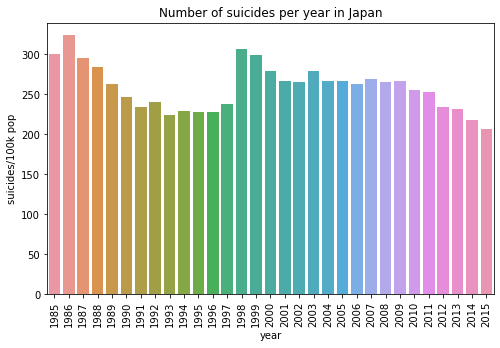

In [78]:
suicides_no_year = []

for y in df_japan['year'].unique():
    suicides_no_year.append(sum(df_japan[df_japan['year'] == y]["suicides/100k pop"]))

n_suicides_year = pd.DataFrame(suicides_no_year, columns=["suicides/100k pop"])
n_suicides_year['year'] = df_japan['year'].unique()

top_year = n_suicides_year.sort_values('suicides/100k pop', ascending=False)['year']
top_suicides = n_suicides_year.sort_values('suicides/100k pop', ascending=False)['suicides/100k pop']

plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
plt.title("Number of suicides per year in Japan")
sns.barplot(x = top_year, y = top_suicides)

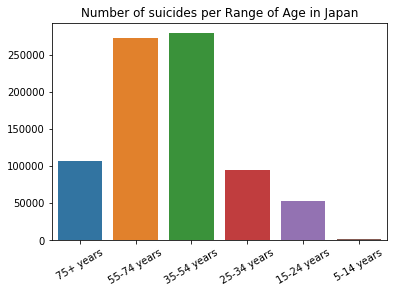

In [79]:
suicides_no_age = []

for a in df_japan['age'].unique():
    suicides_no_age.append(sum(df_japan[df_japan['age'] == a]['suicides_no']))

plt.xticks(rotation=30)
plt.title("Number of suicides per Range of Age in Japan")
sns.barplot(x = df_japan['age'].unique(), y = suicides_no_age)

In [80]:
df_japan['sex'].value_counts()

male      186
female    186
Name: sex, dtype: int64

Text(0.5, 1.0, 'Distribution Of Female Vs male in Japan Dataset')

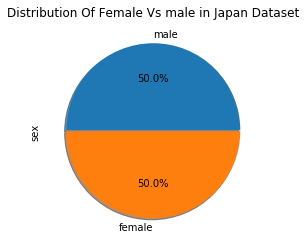

In [81]:
explode=(0.01,0)

sexPie=df_japan['sex'].value_counts()  
sexPie.plot(kind='pie', explode=explode, autopct="%1.1f%%", shadow=True)
plt.title("Distribution Of Female Vs male in Japan Dataset")

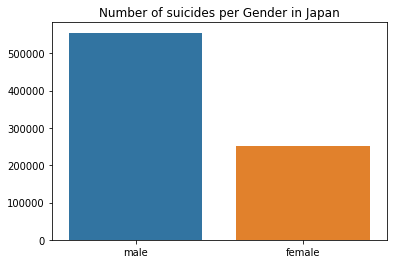

In [82]:
suicides_no_sex = []

for s in df_japan['sex'].unique():
    suicides_no_sex.append(sum(df_japan[df_japan['sex'] == s]['suicides_no']))
plt.title("Number of suicides per Gender in Japan")
sns.barplot(x =df_japan['sex'].unique(), y = suicides_no_sex)

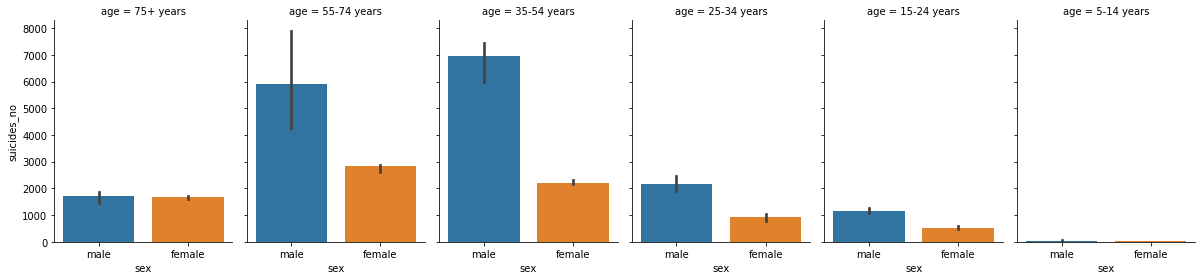

In [83]:
sns.catplot(x='sex', y='suicides_no',col='age', data=df_japan, estimator=np.median,height=4, aspect=.7,kind='bar')

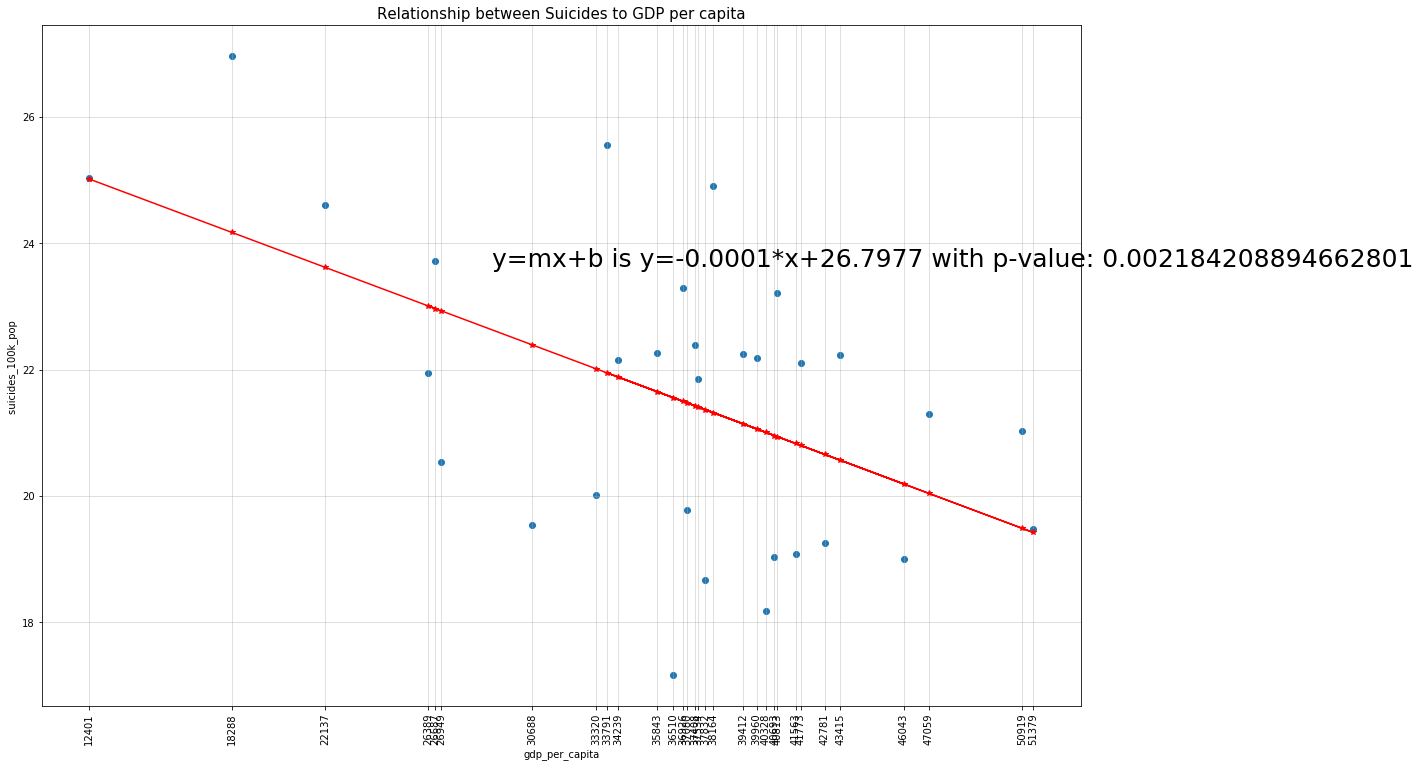

In [84]:
gdp_per_capita =df_japan.groupby("year")["gdp_per_capita"].mean()
suicides_100k_pop = df_japan.groupby("year")["suicides/100k pop"].mean()
slope, intercept, rvalue, pvalue, stderr = st.linregress(gdp_per_capita, suicides_100k_pop)

line = slope * gdp_per_capita  + intercept
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(15,10))

plt.scatter(gdp_per_capita,suicides_100k_pop)   
plt.tight_layout()
plt.title('Relationship between Suicides to GDP per capita',fontsize=15)
plt.xlabel("gdp_per_capita")
plt.ylabel("suicides_100k_pop ")

plt.xticks(gdp_per_capita, rotation=90)
plt.grid(b=True,alpha=0.50)
plt.annotate(s=f'y=mx+b is y={round(slope,4)}*x+{round(intercept,4)} with p-value: {pvalue}',xy=(450,440),xycoords='axes points',fontsize=25)

plt.plot(gdp_per_capita, slope*gdp_per_capita + intercept,marker='*',color='r')

plt.show()

In [85]:
df_compare=pd.DataFrame({'Year':gdp_per_capita.index,'GDPperCapita':gdp_per_capita,'Sper100K':suicides_100k_pop})

Text(0.5, 1, 'Relationship between Suicides to GDP per capita in Japan')

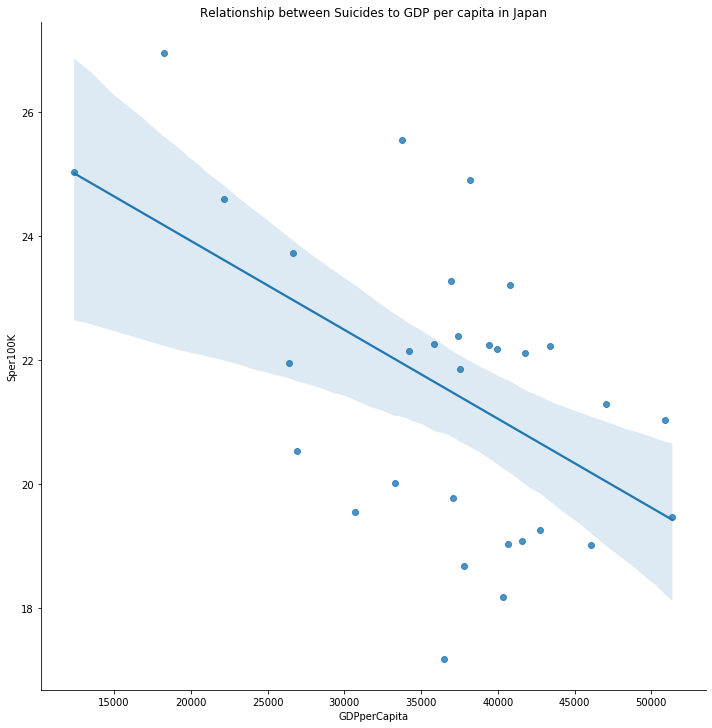

In [86]:
sns.lmplot(x='GDPperCapita',y='Sper100K',fit_reg=True,data=df_compare,height=10)
plt.title('Relationship between Suicides to GDP per capita in Japan')

In [87]:
apik='YfhSSAXAIv21DhZA4W5LjxuaWbKVokWN'

url2= f'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=suicide&api-key={apik}'

In [88]:
requests.get(url2).url

'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=suicide&api-key=YfhSSAXAIv21DhZA4W5LjxuaWbKVokWN'

In [89]:
 data={
    'title':[],
    'detail':[]
}

In [90]:
 response=requests.get(url2).json()
response  

{'status': 'OK',
 'copyright': 'Copyright (c) 2020 The New York Times Company. All Rights Reserved.',
 'response': {'docs': [{'abstract': '“Deaths of Despair and the Future of Capitalism,” by Anne Case and Angus Deaton, describes the growing dysfunction of blue-collar workers in white communities.',
    'web_url': 'https://www.nytimes.com/2020/03/17/books/review/deaths-of-despair-and-the-future-of-capitalism-anne-case-angus-deaton.html',
    'snippet': '“Deaths of Despair and the Future of Capitalism,” by Anne Case and Angus Deaton, describes the growing dysfunction of blue-collar workers in white communities.',
    'lead_paragraph': 'DEATHS OF DESPAIR AND THE FUTURE OF CAPITALISMBy Anne Case and Angus Deaton',
    'source': 'The New York Times',
    'multimedia': [{'rank': 0,
      'subtype': 'xlarge',
      'caption': None,
      'credit': None,
      'type': 'image',
      'url': 'images/2020/04/12/books/review/12Hochschild/17Hochschild-articleLarge.jpg',
      'height': 700,
      

In [91]:
txt=requests.get(url2).text

In [92]:
len(txt.split('Suicide')) + len(txt.split('suicide'))

35

In [93]:
#35 articules realted to suicide. 
